<a href="https://colab.research.google.com/github/yasuhiroinoue/AppMathSci/blob/main/%E5%BF%9C%E7%94%A8%E6%95%B0%E7%90%86(2021_10_18).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**応用数理科学（第３回）**
##**線形１階常微分方程式**
$$\frac{dy}{dx}+p(x)y=r(x)$$
ただし、$p(x)$,$r(x)$は十分に滑らかな関数であるとする。このとき、
$$p(x)=\frac{1}{q(x)}\frac{dq}{dx}$$
を満たす$q(x)$は
$$q(x)=\exp(\int p(x)dx +C)$$
であり、上記の常微分方程式の積分因子という。積分因子を常微分方程式の両辺に掛けて
$$q(x)\frac{dy}{dx}+p(x)q(x)y=\frac{d(q(x)y)}{dx}=r(x)q(x)$$
したがって、上の常微分方程式の解は
$$y=\exp(-\int p(x)dx)[\int r(x)\exp(\int p(x)dx)dx]+A\exp(-\int p(x)dx)$$
（以上は学部1回生のときに「自然現象と数学」で学習している）

##**広告に対する売上**


販売促進をしないと、売れ行きは減少する。季節の影響を除外すると、売り上げ$S$は近似的に
$$\log S = -\lambda t + \mu$$
と表せる。（注意：売り上げは、時間単位あたりである。月間売り上げ、年間売り上げなど。）

つまり、
$$\frac{dS}{dt} = -\lambda S$$
の微分方程式の解となっている。そこで、一歩進めて、この微分方程式を売り上げのダイナミクスを表す式と考えることにし、ここに広告の影響を表す項を付け加えよう。

時刻$t$における単位時間当たりの広告宣伝費$A(t)$、広告の消費者に与える強さ$c$とすると、売り上げの微分方程式は
$$\frac{dS}{dt} = cA-\lambda S$$
となる。しかしながら、製品が無限に売れるわけではない。市場の占有には限りがあるから、（人口増加のところでもやったように）市場飽和時の売り上げ限界$M$を導入し、環境収容力として飽和水準($1-\frac{S}{M})$を導入すると
$$\frac{dS}{dt} = cA(1-\frac{S}{M})-\lambda S$$
が得られる。


方程式を整理すると、
$$\frac{dS}{dt}+(\frac{cA}{M}+\lambda)S = cA$$
となる。これは、冒頭に紹介した線形1階常微分方程式と同じ形で、$p=\frac{cA}{M}+\lambda$、$r=cA$である。

###**例題**
ある指定された期間だけ広告宣伝費をかけ、そのあとは宣伝費をかけないとすると、$ 0 < t < T$では$A(t)=A_o $、$ t > T$では$A(t)=0$である。このとき、売り上げ$S(t)$を求めよ。

（解）
$0<t<T$では
$$S(t)=S_0\exp(-(\lambda+cA_o/M)t)+\frac{cA_o}{\lambda +cA_o/M}(1-\exp(-(\lambda+cA_o/M)t)$$
$t>T$では
$$S(t)=S_T\exp(-\lambda(t-T))$$

###**売り上げ予測のプログラム**

In [ ]:
#Code
%matplotlib inline
import numpy as np
import math
import matplotlib.pyplot as plt

In [ ]:
dt=1/30#month
num = 24*30#2年間
T=2*30#広告宣伝期間=2か月
c=1#広告が購買行動に与える影響力
A_O =1#広告宣伝費 (a.u.)
M=2#飽和売り上げ(a.u.)
lam=1
s=np.zeros(num)
time=np.zeros(num)
totalS=0

for t in range(1,num):
  A=0
  time[t]=t*dt
  if(t<T):
    A=A_O

  S=s[t-1]
  deltaS=c*A*(1-S/M)-lam*S
  deltaS*=dt*0.5
  halfS=S+deltaS
  
  deltaS=c*A*(1-halfS/M)-lam*halfS
  deltaS*=dt
  S+=deltaS
  s[t]=S
  totalS+=S*dt

print('Total Sales=',totalS)


Total Sales= 1.5215959194587623


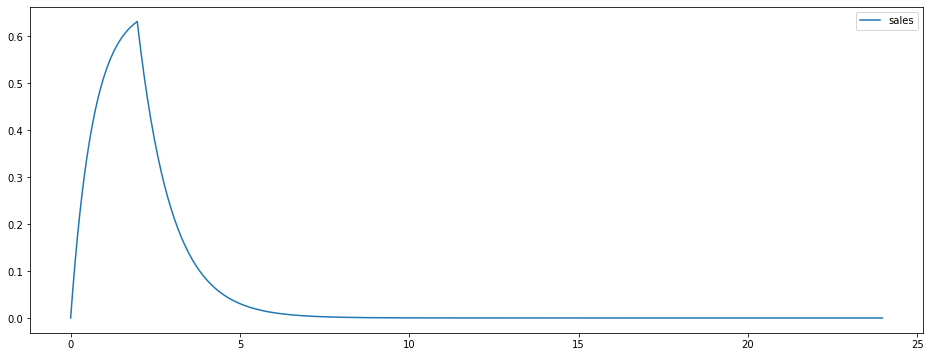

In [ ]:
plt.figure(figsize=(16,6))
plt.plot(time,s,label="sales")
plt.legend()

###**演習**
様々な$A$の値、$T$の値に変えると、売り上げはどのように変わるのか確かめよ。特に、予算$AT=2$を変えずに、短期間の広告、長期間の広告に対して、売り上げはどのように変わるのか？

##**湖の浄化**
いったん汚濁の広がった湖を浄化するのに、どのくらいの時間がかかるのか見積もってみよう。ここでおもな浄化の仕組みには、周辺河川からの流入と流出による湖の水の自然な入れ替えを考える。したがって、湖の水が入れ替わる時間が、重要な時間単位になり、これは滞留時間と呼ばれている。日本の湖の滞留時間については、環境省のホームページにある資料が関連情報も含めて興味深いので見ておくこと。
[(環境省：富栄養化対策マニュアル)3.我が国における湖沼等の富栄養化の現状と対策](https://www.env.go.jp/earth/coop/coop/document/mle2_j/contents.html)


湖の汚染度(COD, BODなど）を$P_l$、流入河川などの汚染度$P_i$、湖への流入と湖からの流出は釣り合っているとして、その流量$r$とする。ある時間間隔$\Delta t$での湖の汚染量の正味の変化は
$$\Delta (VP_l)=(P_i-P_l)r\Delta t$$
である。釣り合い条件から、湖の体積変化はないので、$\Delta t \rightarrow 0$の極限で
$$\frac{dP_l}{dt}=\frac{(P_i-P_l)r}{V}$$
が得られる。これは、冒頭の線形１階常微分方程式であり、積分因子$\exp(rt/V)$を持つので、
$$P_l(t) =\exp(-t/\tau)P_l(0)+\frac{1}{\tau}\int_0^t \exp(-(t-t')/\tau)P_i(t') dt' $$

ここで、$\tau = V/r$とした。これは湖の水の滞留時間である。例えば、琵琶湖では平均滞留時間5.5年であり、諏訪湖では39日間と、湖の大きさや流域環境に依存して滞留時間は大きく異なる。

さて、流域の汚染度がなければ($P_i=0$)、最速で浄化が進むことになる。つまり、浄化時間の下限値は$P_i=0$として
$$t=\tau\log(\frac{P_l(0)}{P_l(t)})$$
となる。


###**演習**
1.   琵琶湖の2020年度COD75%値は北湖2.9mg/L、南湖4.1mg/Lであった。環境基準値(1.0mg/L)を達成するには、最短で何年かかると見積もられるか。ここでは、流域の汚染はないと仮定せよ。
[滋賀の環境2020](https://www.pref.shiga.lg.jp/ippan/kankyoshizen/kankyou/317333.html)

2.   実際には、琵琶湖のCODは何十年も横ばい状態であるが、数理モデルからは、何が原因と考えられるか。考察した原因について、その妥当性を滋賀県が公開するデータで評価せよ。